TensorFlow version: 2.19.0
Tamaño de entrenamiento: (25000, 200)
Tamaño de prueba: (25000, 200)


c:\Users\felip\Desktop\Hands-on 4\.venv\lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn (SimpleRNN)          │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - accuracy: 0.5278 - loss: 0.6900 - val_accuracy: 0.5852 - val_loss: 0.6621
Epoch 2/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.7315 - loss: 0.5767 - val_accuracy: 0.7440 - val_loss: 0.5226
Epoch 3/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.8851 - loss: 0.2985 - val_accuracy: 0.7958 - val_loss: 0.4526
Epoch 4/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.9686 - loss: 0.1131 - val_accuracy: 0.7442 - val_loss: 0.6276
Epoch 5/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.9926 - loss: 0.0435 - val_accuracy: 0.7592 - val_loss: 0.6713


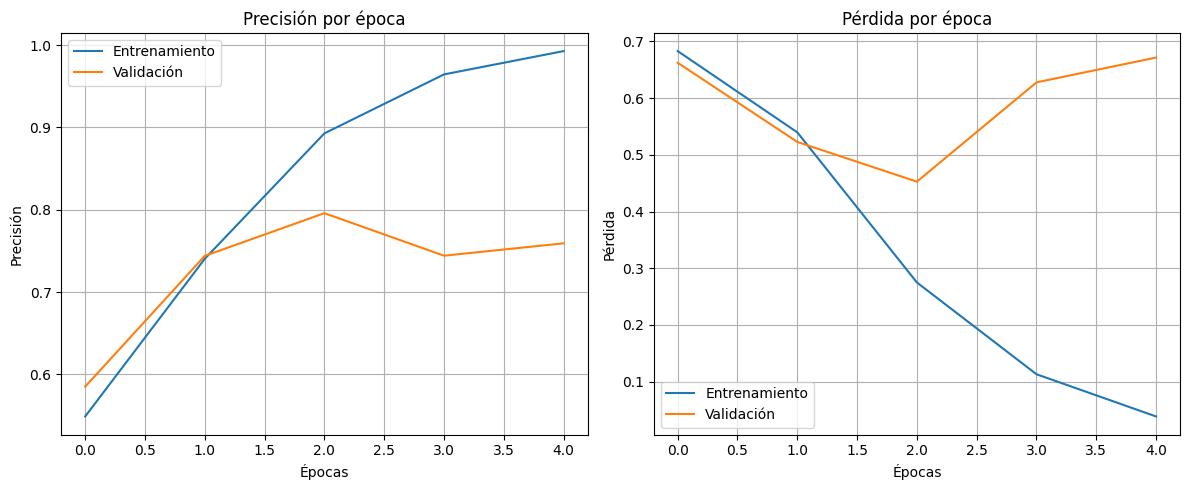

782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7531 - loss: 0.6849

📌 Precisión en el conjunto de prueba: 75.52%


In [1]:
# ================================================
# 📘 GUÍA DE ESTUDIO: REDES NEURONALES RECURRENTES (RNN)
# ================================================

# ✅ 1. Importación de librerías necesarias
import numpy as np                                # Para operaciones numéricas
import tensorflow as tf                           # Framework principal para deep learning
from tensorflow.keras.models import Sequential    # Modelo secuencial
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense  # Capas necesarias
from tensorflow.keras.preprocessing.sequence import pad_sequences # Padding de secuencias
from tensorflow.keras.datasets import imdb        # Dataset IMDB para clasificación de texto
import matplotlib.pyplot as plt                   # Para visualizar resultados

# ✅ Verificamos la versión de TensorFlow
print("TensorFlow version:", tf.__version__)  # Debe ser 2.15.0 o compatible con Python 3.10/3.11

# ✅ 2. Cargar y preparar el dataset IMDB
vocab_size = 10000       # Limitamos el vocabulario a las 10,000 palabras más frecuentes
maxlen = 200             # Todas las secuencias tendrán una longitud de 200 palabras

# Cargar los datos ya tokenizados (como secuencias de enteros)
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=vocab_size)

# Rellenamos (pad) o truncamos las secuencias a una longitud fija
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

# Mostramos las dimensiones
print("Tamaño de entrenamiento:", x_train.shape)
print("Tamaño de prueba:", x_test.shape)

# ✅ 3. Construcción del modelo RNN
model = Sequential()

# Capa de Embedding (convierte IDs de palabras en vectores densos)
model.add(Embedding(input_dim=vocab_size, output_dim=32, input_length=maxlen))

# Capa RNN simple con 32 unidades
model.add(SimpleRNN(units=32, return_sequences=False))  # return_sequences=False: solo salida final

# Capa densa de salida con activación sigmoide (clasificación binaria)
model.add(Dense(1, activation='sigmoid'))

# ✅ 4. Compilación del modelo
model.compile(
    optimizer='adam',                    # Optimizador adaptativo
    loss='binary_crossentropy',         # Pérdida para clasificación binaria
    metrics=['accuracy']                # Métrica de precisión
)

# Mostrar arquitectura
model.summary()

# ✅ 5. Entrenamiento del modelo
history = model.fit(
    x_train, y_train,
    epochs=5,                   # 5 iteraciones completas sobre los datos
    batch_size=128,             # Tamaño de lote
    validation_split=0.2        # 20% para validación interna
)

# ✅ 6. Visualización de resultados
plt.figure(figsize=(12, 5))

# Precisión
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Validación')
plt.title('Precisión por época')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.grid(True)
plt.legend()

# Pérdida
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Entrenamiento')
plt.plot(history.history['val_loss'], label='Validación')
plt.title('Pérdida por época')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

# ✅ 7. Evaluación final del modelo
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"\n📌 Precisión en el conjunto de prueba: {test_accuracy * 100:.2f}%")
